<h1><center>Lending Club Case Study</center></h1>

#### Team details:

*Group Lead:* **Kolavasi Hariharanatha Sarma** <br>
*Team Member:* **Harinath** <br>
*Date:* **August 18, 2024** <br><br>
*Course:* 2 <br>
*Course Name:* Statistics Essentials <br>
*Module:* Group Case Study 1<br>

#### Obejctive of the case study: 
    To find out the important feature that contributes towards the default of a customer using Exploratory data analysis.

#### Importing required packages

In [179]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter

#### Setting default parameters

In [181]:
# Setting default max column and Column width
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

# figure size in inches
rcParams['figure.figsize'] = 7,5
rcParams['figure.titlesize'] = 'medium'

# Ignoring the warnings 
warnings.filterwarnings("ignore")

#### Changing the root directory

Change the root directory based on the location of the data file

####  Reading the csv file

In [184]:
loan_master = pd.read_csv('loan.csv')
loan_master.shape

(39717, 111)

## Data Analysis 



## Data Cleaning

### Null Values

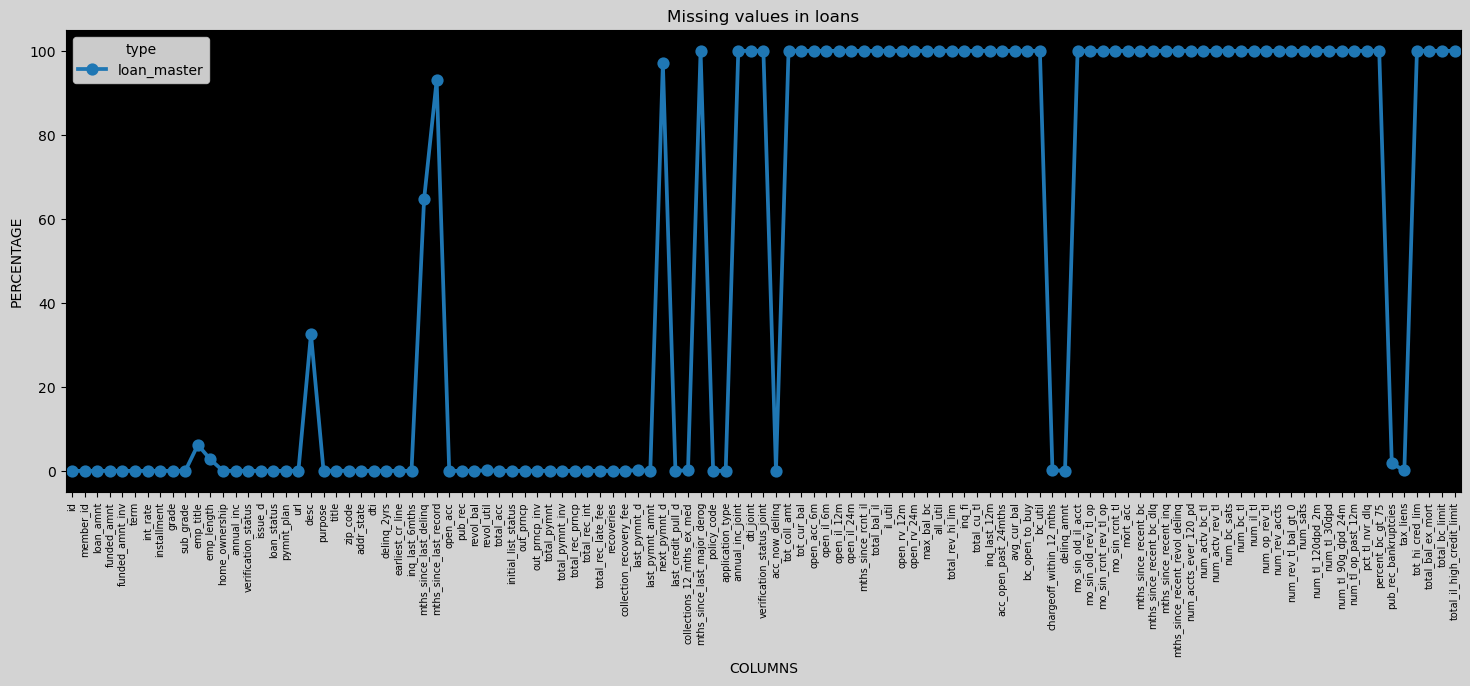

In [188]:
fig = plt.figure(figsize=(18,6))
loan_master_missing_data = pd.DataFrame((loan_master.isnull().sum())*100/loan_master.shape[0]).reset_index()
loan_master_missing_data["type"] = "loan_master"
ax = sns.pointplot(x="index",y=0,data=loan_master_missing_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Missing values in loans")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [189]:
round(100*(loan_master.isnull().sum()/len(loan_master.index)),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

**Observation:**<br>
There are lot of columns which have null values.<br><br>
**Action:** <br>
Drop all the columns which have more than 50% Null value as they are not useful.

In [191]:
loan_master_cleansed = loan_master.loc[:, (100*(loan_master.isnull().sum()/len(loan_master.index))) < 50]

In [192]:
loan_master_cleansed.shape

(39717, 54)

In [193]:
# Viewing the null value % 
loan_master_cleansed.isnull().sum().sort_values()[-15:]*100/loan_master_cleansed.shape[0]

purpose                        0.000000
member_id                      0.000000
issue_d                        0.000000
term                           0.000000
last_credit_pull_d             0.005036
title                          0.027696
tax_liens                      0.098195
revol_util                     0.125891
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
last_pymnt_d                   0.178765
pub_rec_bankruptcies           1.754916
emp_length                     2.706650
emp_title                      6.191303
desc                          32.585543
dtype: float64

**Observation:**<br>
- Column `desc`  has significantly large number of null values.
- Based on the data dictionary, it is not important attribute that predict if the customer is defaulter or not  during the application process.

**Action:**
 It is better to drop desc column. 

In [195]:

# Subset columns with 30% Null values 
columns_list = ['desc']

loan_master_cleansed.drop(columns_list, axis=1, inplace=True)
print(f"Shape of the filtered data - {loan_master_cleansed.shape}")

Shape of the filtered data - (39717, 53)


In [196]:
loan_master_cleansed.isnull().sum().sort_values()[-10:]

last_credit_pull_d               2
title                           11
tax_liens                       39
revol_util                      50
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
last_pymnt_d                    71
pub_rec_bankruptcies           697
emp_length                    1075
emp_title                     2459
dtype: int64

In [197]:
null_columns = (loan_master_cleansed.isnull().sum() * 100 / loan_master_cleansed.shape[0]).sort_values()

Null_columns_list = null_columns[null_columns > 0].index.tolist()

loan_master_cleansed[Null_columns_list]

,last_credit_pull_d,title,tax_liens,revol_util,chargeoff_within_12_mths,collections_12_mths_ex_med,last_pymnt_d,pub_rec_bankruptcies,emp_length,emp_title
0,May-16,Computer,0.0,83.70%,0.0,0.0,Jan-15,0.0,10+ years,NaN
1,Sep-13,bike,0.0,9.40%,0.0,0.0,Apr-13,0.0,< 1 year,Ryder
2,May-16,real estate business,0.0,98.50%,0.0,0.0,Jun-14,0.0,10+ years,NaN
3,Apr-16,personel,0.0,21%,0.0,0.0,Jan-15,0.0,10+ years,AIR RESOURCES BOARD
4,May-16,Personal,0.0,53.90%,0.0,0.0,May-16,0.0,1 year,University Medical Group
...,...,...,...,...,...,...,...,...,...,...
39712,Jun-10,Home Improvement,NaN,13.10%,NaN,NaN,Jul-10,NaN,4 years,FiSite Research
39713,Jul-10,Retiring credit card debt,NaN,26.90%,NaN,NaN,Jul-10,NaN,3 years,"Squarewave Solutions, Ltd."
39714,Jun-07,MBA Loan Consolidation,NaN,19.40%,NaN,NaN,Apr-08,NaN,< 1 year,NaN
39715,Jun-07,JAL Loan,NaN,0.70%,NaN,NaN,Jan-08,NaN,< 1 year,NaN


In [198]:
loan_master_cleansed[Null_columns_list].describe()

,tax_liens,chargeoff_within_12_mths,collections_12_mths_ex_med,pub_rec_bankruptcies
count,39678.0,39661.0,39661.0,39020.000000
mean,0.0,0.0,0.0,0.043260
std,0.0,0.0,0.0,0.204324
min,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.000000
max,0.0,0.0,0.0,2.000000


**Observation:**<br>
- `tax_liens`, `collections_12_mths_ex_med` and `chargeoff_within_12_mths` have zero varience in their column. 
- In `pub_rec_bankruptcies` column, very large number of values are 0.

**Actions:**
- Drop all the 0 varience columns 
- Impute the value __0__ for `pub_rec_bankruptcies` column

In [200]:
columns_with_0_varience = ['tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']

loan_master_cleansed.drop(columns_with_0_varience, inplace=True, axis=1)

#### Null value treatment of pub_rec_bankruptcies column

In [202]:
loan_master_cleansed.pub_rec_bankruptcies.value_counts(dropna=False)

pub_rec_bankruptcies
0.0    37339
1.0     1674
NaN      697
2.0        7
Name: count, dtype: int64

In [203]:
# Replacing Null with 'Unknown'

loan_master_cleansed.loc[loan_master_cleansed.pub_rec_bankruptcies.isnull(), 'pub_rec_bankruptcies'] = 'Unknown'

#### Null value treatment of emp_length column

In [205]:
loan_master_cleansed.emp_length.value_counts(dropna=False)

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: count, dtype: int64

**Observation:**<br>
- `emp_length` column talks about the experience of the employee and relatively a large number of these values are _Null_.

**Actions:**
- It is better to categorize these _Null_ values as a separate category __'Unknown'__ rather than imputing the mode of the columns as it might skew the data. 

In [207]:
# replacing Null values with 'Unknown'
loan_master_cleansed.loc[loan_master_cleansed.emp_length.isnull(), 'emp_length'] = 'Unknown'

#### Final checking for presence of Null values

In [209]:
# Checking for the presence of Null values in the df
# using assert function 
assert loan_master_cleansed.isnull().sum().all() == 0

print(loan_master_cleansed.shape)

(39717, 50)


### Unique value treatment

In [211]:
# looking for varience across columns
(loan_master_cleansed.nunique()).sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           4
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    12
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp 

**Observation:**<br>
- 6 columns have only 1 unique value in the entire column, which means the varience is 0. 
- 3 columns have __39,717__ unique values which is equivalent to the shape of the dataframe. These columns will not help us as they are unique for all the records. 

**Actions:**
- It is better to drop these column fully. 

In [213]:
unique_values = (loan_master_cleansed.nunique()).sort_values()

unique_values_equal_to_1 = unique_values[unique_values == 1].index.tolist()
print(f"Number of columns having only one value - {len(unique_values_equal_to_1)}")

unique_values_equal_to_record_counts = unique_values[unique_values == loan_master_cleansed.shape[0]].index.tolist()
print(f"Number of columns having unique value in each record - {len(unique_values_equal_to_record_counts)}")

loan_master_cleansed.drop(unique_values_equal_to_1, axis=1, inplace=True)
loan_master_cleansed.drop(unique_values_equal_to_record_counts, axis=1, inplace=True)

print(f"Shape of the filtered data - {loan_master_cleansed.shape}")

Number of columns having only one value - 6
Number of columns having unique value in each record - 3
Shape of the filtered data - (39717, 41)


### Transforming few columns as per the need

#### Converting the Date column datatype and creating new columns for Month and Year

In [216]:
loan_master_cleansed['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [217]:
# Covnert datetime datetype of few columns
loan_master_cleansed['issue_d'] = loan_master_cleansed['issue_d'].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [218]:
## Creating new columns for Month and Year 
loan_master_cleansed['issue_year'] = loan_master_cleansed.issue_d.dt.year.astype('category')
loan_master_cleansed['issue_month'] = loan_master_cleansed.issue_d.dt.month.astype('category')


#### Removing Spaces from `term` column and treating it as categorical column

In [220]:
loan_master_cleansed.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [221]:
loan_master_cleansed.term = loan_master_cleansed.term.apply(lambda x: x.strip()).astype('category')

#### Removing Current label from the `loan_status` column

In [223]:
loan_master_cleansed.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [224]:
(loan_master_cleansed.loan_status.value_counts(normalize=True)*100.).round(2)

loan_status
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: proportion, dtype: float64

#### Removing % from int_rate and converting the column to float datatypes

In [226]:
# View sample values 
loan_master_cleansed.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [227]:
# remove % and change datatype
loan_master_cleansed.int_rate = loan_master_cleansed.int_rate.str.strip().str.replace('%', '').astype('float64')

#### Removing Zip-code as it is hashed out and the useful information is already available in addr_state

In [229]:
loan_master_cleansed.zip_code.value_counts()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64

**Observation:**
- Last two digits of the `zip_code` is hashed out
- The first 2 digits depicts the state of the customer which is already present in `addr_state` column

**Action:**
Drop the `zip_code` column

In [231]:
loan_master_cleansed.drop(['zip_code'], axis=1, inplace=True)

#### Converting the Case of the `purpose` columns to lower case

In [233]:
loan_master_cleansed.purpose = loan_master_cleansed.purpose.str.lower()

In [234]:
print(f"Shape of the dataframe after required column treatments - {loan_master_cleansed.shape}")

Shape of the dataframe after required column treatments - (39717, 42)


### Outlier treatment 

Checking for outliers only in int and float columns of the data<br>

**Assumption:**
Only data points __outside 3 times the IQR range__ would be considered as outlier. This is because, in this business use case, it is possible to have very high values in the upper end. To avoid unfair tagging of outliers, it is better to extend the length of the box plot. 

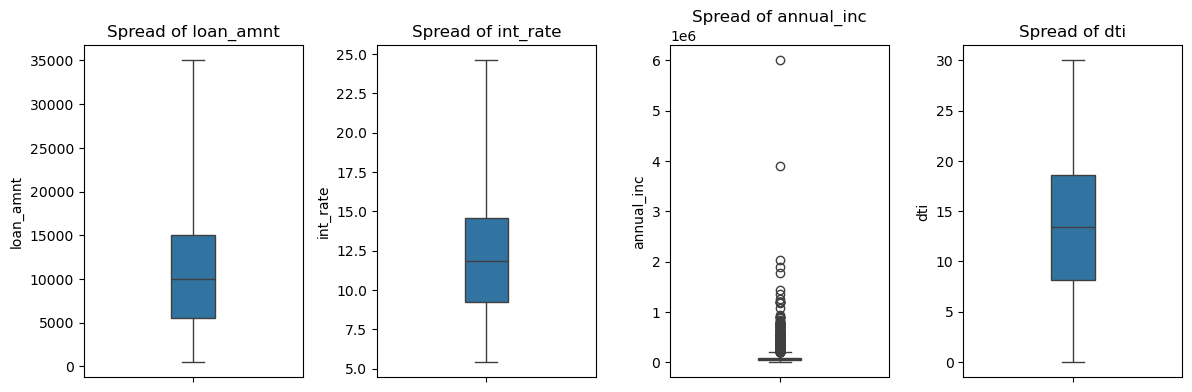

In [236]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

ax1 = sns.boxplot(y=loan_master_cleansed['loan_amnt'], width=0.2, whis=3, ax=axs[0])
ax1.set(title=f'Spread of loan_amnt')

ax2 = sns.boxplot(y=loan_master_cleansed['int_rate'], width=0.2, whis=3, ax=axs[1])
ax2.set(title=f'Spread of int_rate')

ax3 = sns.boxplot(y=loan_master_cleansed['annual_inc'], width=0.2, whis=3, ax=axs[2])
ax3.set(title=f'Spread of annual_inc')

ax4 = sns.boxplot(y=loan_master_cleansed['dti'], width=0.2, whis=3, ax=axs[3])
ax4.set(title=f'Spread of dti')

plt.tight_layout(pad=1)
plt.show()

**Observation:**
- `loan_amnt`, `int_rate` and `dti` have no outliers.
- `annual_inc` column has large number of outlier presence. 


#### Outlier treatment in `annual_inc` column

**Action:**
- Data points outside the upper and lower limits would be __flagged off__ as outliers in a separate column.
- We do not remove the records because these values in annual_inc column is still possible in the practical scenario. 

In [240]:
# Calculating the Q1 and Q3 using percentile function
Q1 = np.percentile(loan_master_cleansed.annual_inc, 25, interpolation = 'midpoint') 
Q3 = np.percentile(loan_master_cleansed.annual_inc, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 75 percentile of the given data is, ', Q3)

# Calculating the IQR Range using Q3 and Q1 values
IQR = Q3 - Q1 
print('\nInterquartile range is', IQR)

# Calculating the lower and upper limit values
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print('\nlow_limit is', lower_limit)
print('up_limit is', upper_limit)

Q1 25 percentile of the given data is,  40404.0
Q1 75 percentile of the given data is,  82300.0

Interquartile range is 41896.0

low_limit is -85284.0
up_limit is 207988.0


## Univariate analysis

For all the Univariate analysis, we have leveraged the UDFs written in the library portion of the notebook.

#### Starting with Categorical columns

 ### Home ownership of the applicant 

Text(0, 0.5, 'Count of applicants')

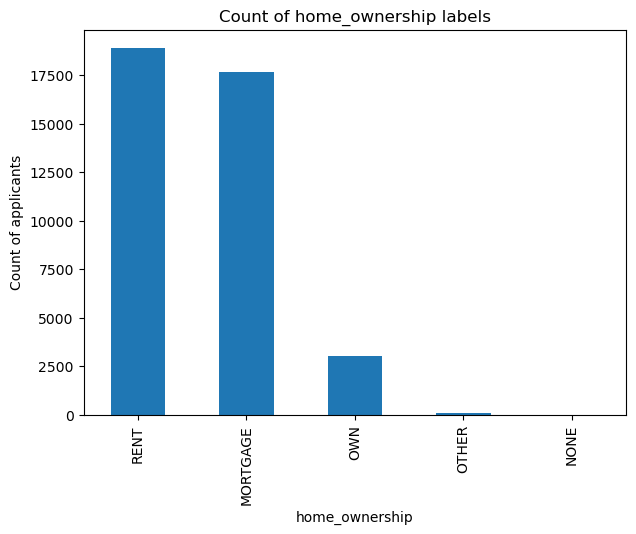

In [243]:
loan_master_cleansed['home_ownership'].value_counts().reindex(None).plot(kind='bar')
plt.title('Count of home_ownership labels')
plt.xlabel('home_ownership')
plt.ylabel('Count of applicants')


In [244]:
c_ho = loan_master_cleansed['home_ownership'].value_counts()
p_ho = loan_master_cleansed['home_ownership'].value_counts(normalize=True).mul(100)
pd.concat([c_ho,p_ho], axis=1, keys=['Counts', 'Percentage'])

,Counts,Percentage
home_ownership,,
RENT,18899,47.584158
MORTGAGE,17659,44.462069
OWN,3058,7.699474
OTHER,98,0.246746
NONE,3,0.007553


**Observation:**
1. `Rent` and `Mortgage` have the highest number of loan applicant covering 90% of our data. 
2. It is fair to assume that, people with `own` house have better finance management and are less likely to apply for a loan. 

### Verification Status of the loan application

Text(0, 0.5, 'Count of applicants')

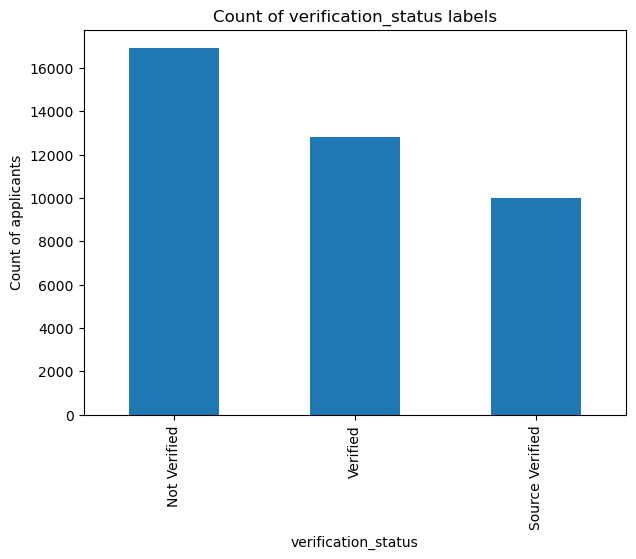

In [247]:
loan_master_cleansed['verification_status'].value_counts().reindex(None).plot(kind='bar')
plt.title('Count of verification_status labels')
plt.xlabel('verification_status')
plt.ylabel('Count of applicants')

In [248]:
c_vs = loan_master_cleansed['verification_status'].value_counts()
p_vs = loan_master_cleansed['verification_status'].value_counts(normalize=True).mul(100)
pd.concat([c_vs,p_vs], axis=1, keys=['Counts', 'Percentage'])

,Counts,Percentage
verification_status,,
Not Verified,16921,42.603923
Verified,12809,32.250674
Source Verified,9987,25.145404


**Observation:**
1. High number of applicants (43%) are not verified before lending a loan which might be risk to the lender. 

**Recommendation:**
##### Verify the loan application


### Loan Status - Dependent column

Text(0, 0.5, 'Count of applicants')

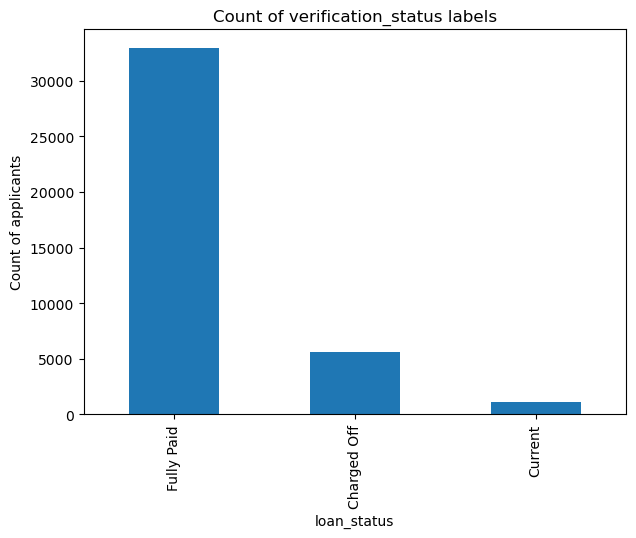

In [251]:
loan_master_cleansed['loan_status'].value_counts().reindex(None).plot(kind='bar')
plt.title('Count of verification_status labels')
plt.xlabel('loan_status')
plt.ylabel('Count of applicants')

In [252]:

c_ls = loan_master_cleansed['loan_status'].value_counts()
p_ls = loan_master_cleansed['loan_status'].value_counts(normalize=True).mul(100)
pd.concat([c_ls,p_ls], axis=1, keys=['Counts', 'Percentage'])

,Counts,Percentage
loan_status,,
Fully Paid,32950,82.961956
Charged Off,5627,14.167737
Current,1140,2.870307


**Observation:**
1. High chances of Default for Charged Off applicants.
2. Applicants who are still paying loan may not be able to pay more installment. Check the eligibility.

### Purpose of the loan given by applicant

Text(0, 0.5, 'Count of applicants')

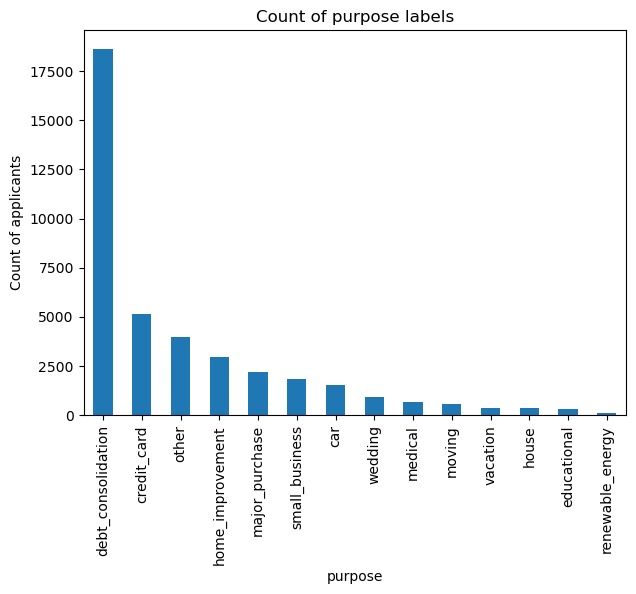

In [255]:
loan_master_cleansed['purpose'].value_counts().reindex(None).plot(kind='bar')
plt.title('Count of purpose labels')
plt.xlabel('purpose')
plt.ylabel('Count of applicants')

**Observation:**
1. Debt consolidation signifies mismanagement of financials. Be vary of such applications

### Month on which loan was applied

Text(0, 0.5, 'Count of applicants')

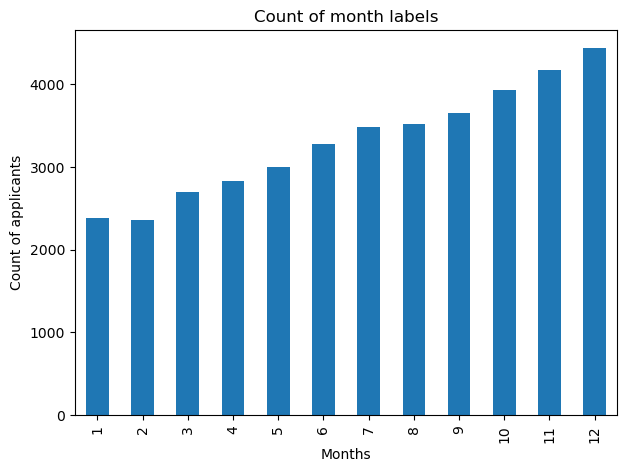

In [258]:
xlabel = [1,2,3,4,5,6,7,8,9,10,11,12]

loan_master_cleansed['issue_month'].value_counts().reindex(xlabel).plot(kind='bar')
plt.title('Count of month labels')
plt.xlabel('Months')
plt.ylabel('Count of applicants')

**Observation:**
1. More debt at the end of the year indicates more money spent on shopping during year end sales without proper financial planning.

### Number of publically recorded bankruptcies applied by the applicant

Text(0, 0.5, 'Count of applicants')

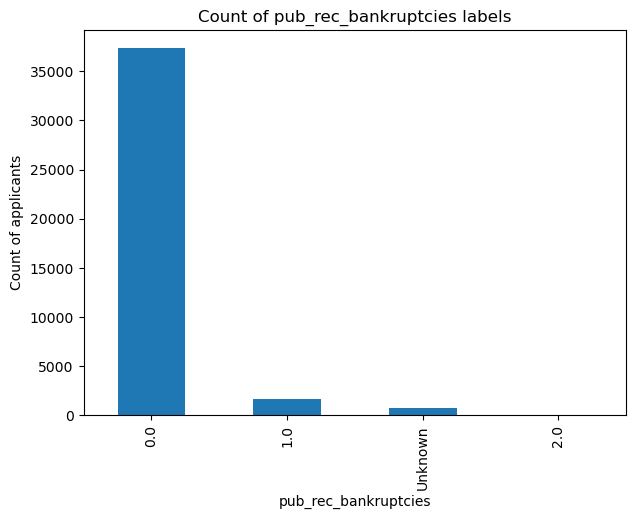

In [261]:

loan_master_cleansed['pub_rec_bankruptcies'].value_counts().reindex(None).plot(kind='bar')
plt.title('Count of pub_rec_bankruptcies labels')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count of applicants')

**Observation:**
1. Most of the applicants haven't filed bankruptcies
2. Very few records are available for the labels 1 and 2. 

### Debt-to-income ratio of the customer

[Text(0.5, 0, 'dti'),
 Text(0, 0.5, 'Count of applicants'),
 Text(0.5, 1.0, 'Distribution of DTI')]

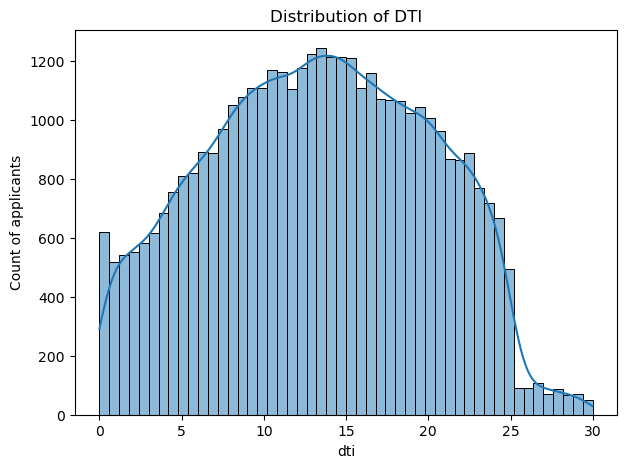

In [264]:
# Distribution of the annual income
#univariate_numerical_chart(df, 'dti')

ax = sns.histplot(data=loan_master_cleansed, x='dti', kde=True)
ax.set(xlabel='dti', ylabel='Count of applicants', title=f'Distribution of DTI')



**Observation:**
1. dti follows normal distribution !

## Bivariate Analysis

- As the main cue variable is `Loan Status` to find defaulter, let us consider all major attributes correlation to `Loan Status`. 

In [416]:
def bivariate_categorical_table(df,
                                col,
                                xlabel=None):
    '''Returns a bivariate chart for the given categorical column''' 
    temp_df = (df.groupby(col)['loan_status'].value_counts()
                                             .unstack()
                                             .fillna(0))
    
    temp_df['Total'] = temp_df['Current'] + temp_df['Charged Off'] + temp_df['Fully Paid']
    
    temp_df['Defult%'] = round(temp_df['Charged Off']*100 / temp_df['Total'], 2)
    temp_df['Good%'] = round(temp_df['Fully Paid']*100 / temp_df['Total'], 2)
    temp_df['Neutral%'] = round(temp_df['Current']*100 / temp_df['Total'], 2)
    
    return temp_df.sort_values('Total', ascending=False).reindex(xlabel)

In [418]:
def bivariate_subplots(plot_df, shape):
    fig, ax = plt.subplots()
    
    index = np.arange(shape)
    width = 0.15
    plt.grid(zorder=0)

    ax.bar(index-width, plot_df['Fully Paid'], 2*width, label='Fully Paid', zorder=3)
    ax.bar(index+width, plot_df['Charged Off'], 2*width,  label='Charged Off', zorder=3)
    ax.bar(index+3*width, plot_df['Current'], 2*width,  label='Current', zorder=3)
    
    ax2 = ax.twinx()
    ax2.plot(plot_df.index, plot_df["Defult%"], color="black", marker="D", label='Bad Credit %')
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    
    ax.set_xlabel('Loan tenure applied by the applicant')
    ax.set_ylabel('Number of Applicants')
    ax2.set_ylabel('% of Bad Credit')
    
    ax.set_title('Loan tenure across Credit')

    fig.legend()
    plt.show()

### loan tenure to loan_status correlation

In [304]:

c_term_ls = loan_master_cleansed.groupby('term')['loan_status'].value_counts()
p_term_ls = loan_master_cleansed.groupby('term')['loan_status'].value_counts(normalize=True).mul(100)
plot_df = pd.concat([c_term_ls,p_term_ls], axis=1, keys=['Counts', 'Percentage'])
plot_df


Counts  Percentage
term      loan_status                    
36 months Fully Paid    25869   88.909128
          Charged Off    3227   11.090872
          Current           0    0.000000
60 months Fully Paid     7081   66.669805
          Charged Off    2400   22.596742
          Current        1140   10.733453

In [352]:
# PLotting charts to understand the distibution across loan status 

plot_df = bivariate_categorical_table(loan_master_cleansed, 'term')

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
term,,,,,,,
36 months,3227,0,25869,29096,11.09,88.91,0.00
60 months,2400,1140,7081,10621,22.60,66.67,10.73


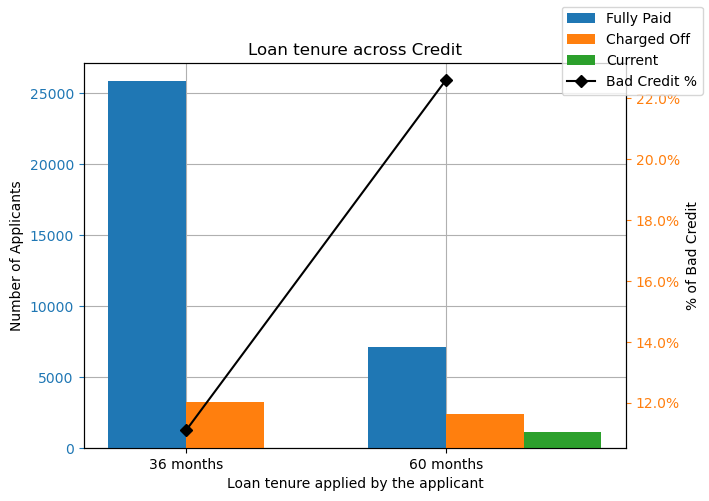

In [354]:
bivariate_subplots(plot_df, 2)

**Observation:**


    Higher tenure have higher possibility for default

### loan_status and public bankruptcies of the applicant correlation 

In [356]:
label = [0, 1, 2, 'Unknown']
plot_df = bivariate_categorical_table(loan_master_cleansed, 'pub_rec_bankruptcies',label )
plot_df.index = ['0', '1', '2', 'Unknown']

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
0,5141.0,1101.0,31097.0,37339.0,13.77,83.28,2.95
1,366.0,37.0,1271.0,1674.0,21.86,75.93,2.21
2,2.0,2.0,3.0,7.0,28.57,42.86,28.57
Unknown,118.0,0.0,579.0,697.0,16.93,83.07,0.00


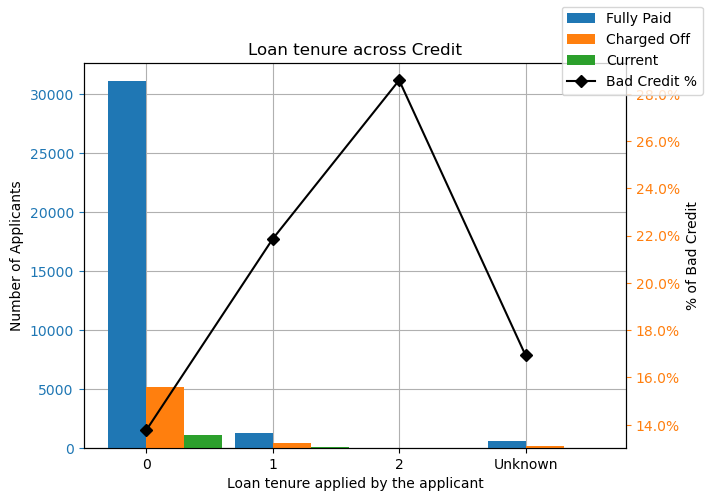

In [358]:

bivariate_subplots(plot_df, 4)


**Observation:**

    Applicants with public record of bankruptices have higher default rates.

### loan_status and home ownership of the applicant correlation

In [361]:
plot_df = bivariate_categorical_table(loan_master_cleansed, 'home_ownership')
plot_df

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
home_ownership,,,,,,,
RENT,2839.0,419.0,15641.0,18899.0,15.02,82.76,2.22
MORTGAGE,2327.0,638.0,14694.0,17659.0,13.18,83.21,3.61
OWN,443.0,83.0,2532.0,3058.0,14.49,82.80,2.71
OTHER,18.0,0.0,80.0,98.0,18.37,81.63,0.00
NONE,0.0,0.0,3.0,3.0,0.00,100.00,0.00


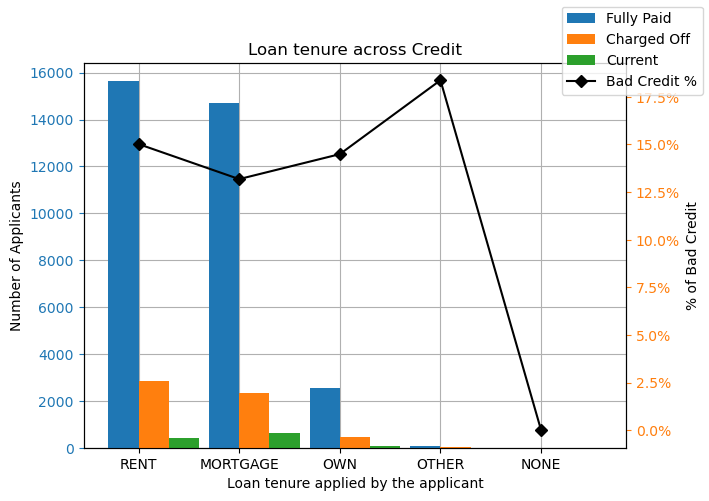

In [363]:
bivariate_subplots(plot_df, 5)

**Observation:**

    No trend is observed with home owenrship attribute.

### loan_status and loan amount of the applicant correlation

In [371]:
# Segmenting into 5 buckets such as very low, low, medium, high, very high
buckets = 5
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
class_interval = loan_master_cleansed.loan_amnt.max() / buckets
bins = [i*class_interval for i in range(buckets+1)]

loan_master_cleansed['loan_amnt_bins'] = pd.cut(loan_master_cleansed['loan_amnt'], bins, labels=labels)

plot_df = bivariate_categorical_table(loan_master_cleansed, 'loan_amnt_bins')
plot_df

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
loan_amnt_bins,,,,,,,
Very Low,1887,161,12420,14468,13.04,85.84,1.11
Low,1786,315,11512,13613,13.12,84.57,2.31
Medium,1155,347,5886,7388,15.63,79.67,4.70
High,538,176,2252,2966,18.14,75.93,5.93
Very High,261,141,880,1282,20.36,68.64,11.00


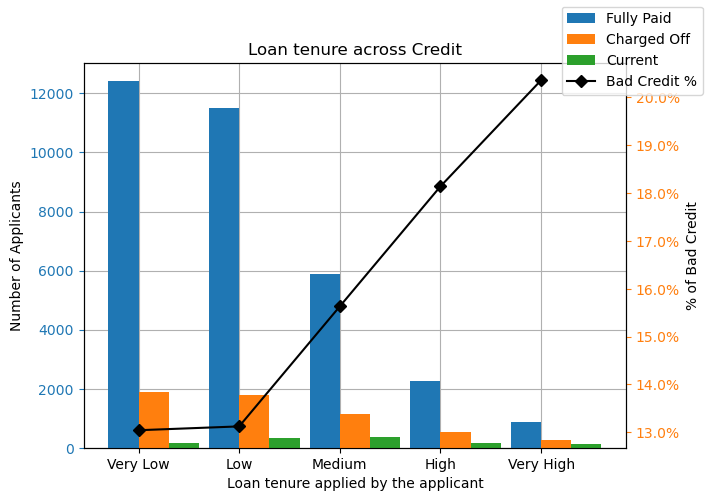

In [373]:
bivariate_subplots(plot_df, 5)

**Observation:**


    Very Low and Low loan have lower percentage of defaults. It increase with the loan amounts. 

### loan_status and Verification Status of the application correlation

In [379]:

plot_df = bivariate_categorical_table(loan_master_cleansed, 'verification_status')
plot_df

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
verification_status,,,,,,,
Not Verified,2142,227,14552,16921,12.66,86.00,1.34
Verified,2051,603,10155,12809,16.01,79.28,4.71
Source Verified,1434,310,8243,9987,14.36,82.54,3.10


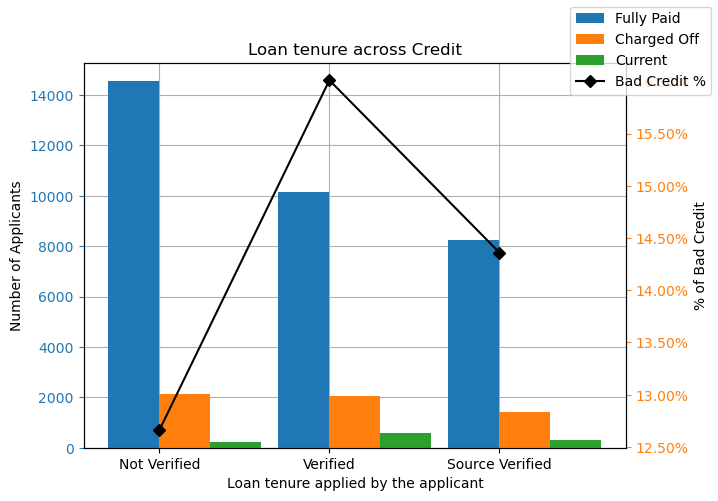

In [381]:
bivariate_subplots(plot_df, 3)

**Observation:**
    
    No trend observed using verificatino status 

### loan_status and interest rates of the loan correlation   

Creating bins for easier understanding 

In [383]:
bins = [ i * 4 for i in range(1, 8)]
labels = ['4-8%', '8-12%', '12-16%', '16-20%', '20-24%', '24-28%']
# Looking at the number of frequency of the int_rate
loan_master_cleansed['int_rate_bins'] = pd.cut(loan_master_cleansed['int_rate'], bins, labels=labels)

In [387]:
plot_df = bivariate_categorical_table(loan_master_cleansed, 'int_rate_bins').sort_index()
plot_df

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
int_rate_bins,,,,,,,
4-8%,440,15,7778,8233,5.34,94.47,0.18
8-12%,1456,293,10987,12736,11.43,86.27,2.30
12-16%,2169,371,10339,12879,16.84,80.28,2.88
16-20%,1266,359,3372,4997,25.34,67.48,7.18
20-24%,294,101,472,867,33.91,54.44,11.65
24-28%,2,1,2,5,40.00,40.00,20.00


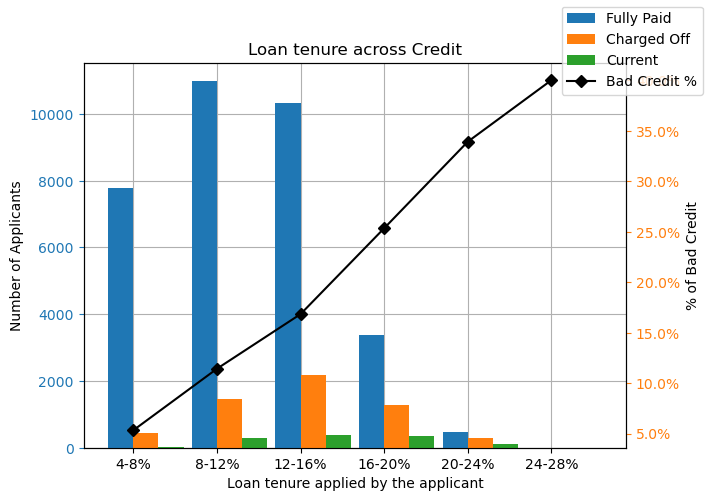

In [389]:
bivariate_subplots(plot_df, 6)

**Observation:**

    Applicants who availed loans with lower interest rates have lower defaults. 

**Observation:**
    
    No pattern observed. It is too random. 

### loan_status and debt-to-income ratio correlation   

Creating bins for easier understanding 

In [391]:
bins = [ i * 5 for i in range(1, 7)]
labels = ['5-10', '10-15', '15-20', '20-25', '25-30']
# Looking at the number of frequency of the 
loan_master_cleansed['dti_bins'] = pd.cut(loan_master_cleansed['dti'], bins, labels=labels)

In [393]:

plot_df = bivariate_categorical_table(loan_master_cleansed, 'dti_bins', labels)
plot_df

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
dti_bins,,,,,,,
5-10,1005,199,6868,8072,12.45,85.08,2.47
10-15,1402,269,8228,9899,14.16,83.12,2.72
15-20,1389,284,7422,9095,15.27,81.61,3.12
20-25,1118,237,5460,6815,16.40,80.12,3.48
25-30,87,53,536,676,12.87,79.29,7.84


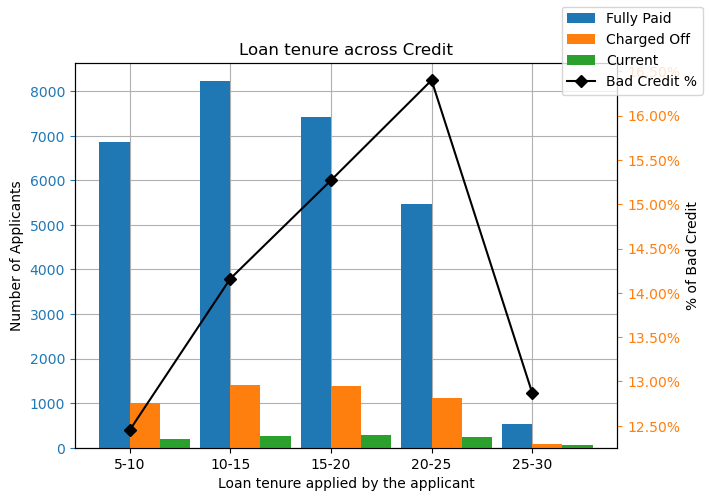

In [397]:
bivariate_subplots(plot_df, 5)

**Observation:**
    
    Debt to income is directly proportional to the bad credit %. 

### loan_status and annul_inc of the applicant correlation   

Creating bins for effective analysis

In [403]:
bins = [0, 40000, 80000, 120000, 160000, 6000000]
labels = ['0-40,000', '40,000-80,000', '80,000-120,000', '120,000-160,000', '160,000+']
loan_master_cleansed['annual_inc_bins'] = pd.cut(loan_master_cleansed['annual_inc'], bins, labels=labels)

In [405]:
plot_df = bivariate_categorical_table(loan_master_cleansed, 'annual_inc_bins', labels)
plot_df

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
annual_inc_bins,,,,,,,
"0-40,000",1751,179,7947,9877,17.73,80.46,1.81
"40,000-80,000",2753,585,16131,19469,14.14,82.85,3.00
"80,000-120,000",775,251,6067,7093,10.93,85.54,3.54
"120,000-160,000",221,76,1707,2004,11.03,85.18,3.79
"160,000+",127,49,1098,1274,9.97,86.19,3.85


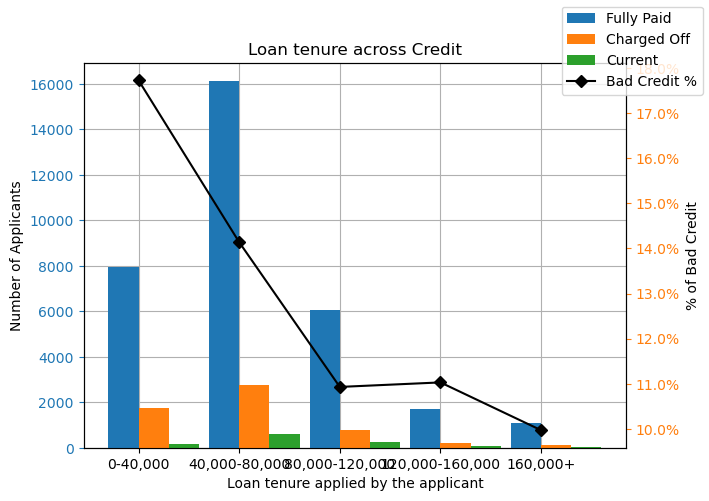

In [407]:
bivariate_subplots(plot_df, 5)

**Observation:**

    Applicants with lower income have higher bad credits %.

### loan_status and purpose of loan correlation   

In [411]:

plot_df = bivariate_categorical_table(loan_master_cleansed, 'purpose')
plot_df

loan_status,Charged Off,Current,Fully Paid,Total,Defult%,Good%,Neutral%
purpose,,,,,,,
debt_consolidation,2767.0,586.0,15288.0,18641.0,14.84,82.01,3.14
credit_card,542.0,103.0,4485.0,5130.0,10.57,87.43,2.01
other,633.0,128.0,3232.0,3993.0,15.85,80.94,3.21
home_improvement,347.0,101.0,2528.0,2976.0,11.66,84.95,3.39
major_purchase,222.0,37.0,1928.0,2187.0,10.15,88.16,1.69
small_business,475.0,74.0,1279.0,1828.0,25.98,69.97,4.05
car,160.0,50.0,1339.0,1549.0,10.33,86.44,3.23
wedding,96.0,21.0,830.0,947.0,10.14,87.65,2.22
medical,106.0,12.0,575.0,693.0,15.30,82.97,1.73


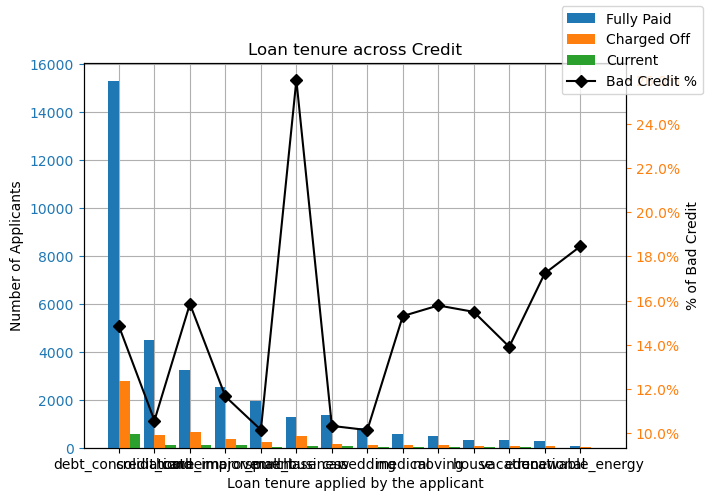

In [413]:
bivariate_subplots(plot_df, 14)

**Observation:**
    
    Small business tend to default more than others. This might be due to the high risk involved in running a business. 